<a href="https://colab.research.google.com/github/Sancheuz123/chiselni_metod/blob/main/%D0%9B%D0%A0_2_%D0%93%D0%B0%D0%B9%D0%B2%D0%BE%D1%80%D0%BE%D0%BD%D1%81%D1%8C%D0%BA%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Гайворонський Олександр
#Група 2-8
#Лабораторна робота №2
Варіант 3

In [1]:
!pip install numdifftools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 2.3 MB/s eta 0:00:00


In [7]:
import numpy as np
import numdifftools as nd
def f(x):
    return 6*x**4 + 4*x**3 + x**2 + x - 10


def find_segments():
    search_range = np.arange(-15, 9, 1)

    a = None
    previous_x = None
    current_x  = None
    segments = []

    for x in search_range:
        x = round(x, 4)
        current_x = f(x)
        if previous_x != None and previous_x * current_x < 0:
            segments.append((a, x))
        a = x
        previous_x = current_x
    return segments

segments = find_segments()
for a, b in segments:
    print(f'Found segment:  [{a}, {b}]')


Found segment:  [-2, -1]
Found segment:  [0, 1]


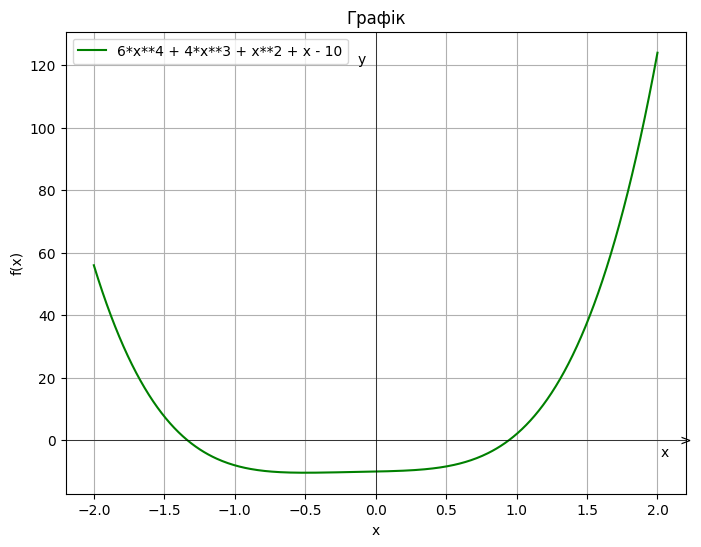

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 6*x**4 + 4*x**3 + x**2 + x - 10

x = np.linspace(-2, 2, 400)

y = f(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y, label='6*x**4 + 4*x**3 + x**2 + x - 10', color='green')
plt.title('Графік')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.text(2.05, -4, 'x', ha='center', va='center')
plt.text(-0.1, 122, 'y', ha='center', va='center')
plt.text(2.2, 0, '>', ha='center', va='center')


plt.grid(True)
plt.legend()
plt.show()


In [22]:
def rec(a, b, eps):
    while (abs(a - b) > eps):
        if f(a) * f((a + b) / 2) < 0:
            b = (a + b) / 2
        else:
            a = (a + b) / 2
        x = (a + b) / 2

    print('x= ', round(x, 5), '  -   Ділення навпіл')

def hord(a, b, eps):
    derivative_f = nd.Derivative(f, n=1)
    if f(a) * derivative_f(a) > 0:
        x0 = a
        xi = b
    else:
        x0 = b
        xi = a
    xi_1 = xi - (xi - x0) * f(xi) / (f(xi) - f(x0))
    while (abs(xi_1 - xi) > eps):
        xi = xi_1
        xi_1 = xi - (xi - x0) * f(xi) / (f(xi) - f(x0))
    print('x= ', round(xi_1, 5), '  -   Метод хорд')

if __name__ == "__main__":
    a1, b1 = -2, -1
    a2, b2 = 0, 1
    eps = 0.0001
    print("Розв'язки на відрізку [-2,-1]")
    rec(a1, b1, eps)
    hord(a1, b1, eps)
    print("\n Розв'язки на відрізку [0,1]")
    rec(a2, b2, eps)
    hord(a2, b2, eps)


Розв'язки на відрізку [-2,-1]
x=  -1.3353   -   Ділення навпіл
x=  -1.33529   -   Метод хорд

 Розв'язки на відрізку [0,1]
x=  0.94504   -   Ділення навпіл
x=  0.94504   -   Метод хорд
